<a href="https://colab.research.google.com/github/Daksh110306/Task-No.4/blob/main/Task_No_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [7]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [9]:
data = pd.read_csv("data.csv")

In [10]:
data = data.drop(columns=["id", "Unnamed: 32"])

In [11]:
data["diagnosis"] = data["diagnosis"].map({'M': 1, 'B': 0})

In [12]:
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

ROC-AUC Score: 0.99737962659679


In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

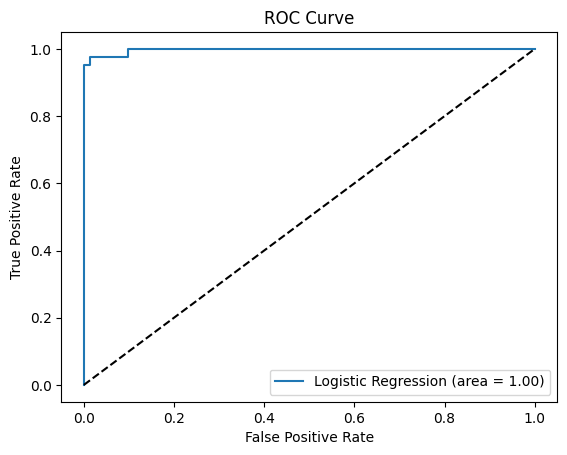

In [24]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
custom_threshold = 0.3
y_custom = (y_prob >= custom_threshold).astype(int)

print("Confusion Matrix with threshold 0.3:")
print(confusion_matrix(y_test, y_custom))


Confusion Matrix with threshold 0.3:
[[67  4]
 [ 1 42]]


In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

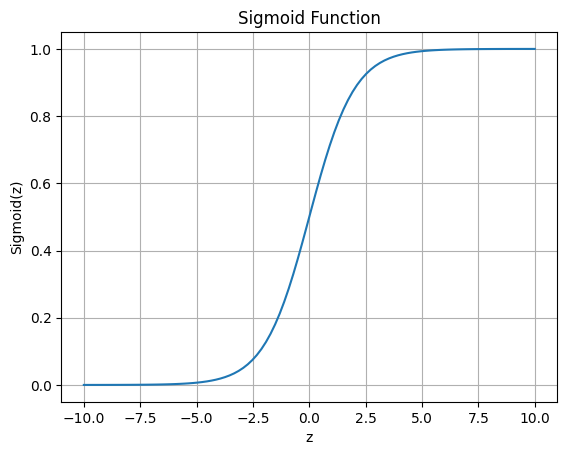

In [27]:
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

In [32]:
!ls -lha


total 140K
drwxr-xr-x 1 root root 4.0K Apr 29 08:25 .
drwxr-xr-x 1 root root 4.0K Apr 29 08:20 ..
drwxr-xr-x 4 root root 4.0K Apr 25 17:43 .config
-rw-r--r-- 1 root root 123K Apr 29 08:25 data.csv
drwxr-xr-x 1 root root 4.0K Apr 25 17:44 sample_data


In [33]:
%%writefile UpdatedData.py

Writing UpdatedData.py


In [34]:
from google.colab import files
files.download('UpdatedData.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>